In [1]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [5]:
import os
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = os.listdir('/home/expert/aiusedcase/carbrand/Datasets/Train')
valid_path = os.listdir('/home/expert/aiusedcase/carbrand/Datasets/Test')

In [6]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)



In [7]:
# don't train existing weights
for layer in resnet.layers:
    layer.trainable = False

In [8]:
# useful for getting number of output classes
folders = glob('/home/expert/aiusedcase/carbrand/Datasets/Train/*')


In [9]:
# our layers - you can add more if you want
x = Flatten()(resnet.output)


In [10]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=resnet.input, outputs=prediction)


In [11]:
# view the structure of the model
model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
_______________________________________________________________________________________

In [12]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [13]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [15]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/home/expert/aiusedcase/carbrand/Datasets/Train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 64 images belonging to 3 classes.


In [16]:
test_set = test_datagen.flow_from_directory('/home/expert/aiusedcase/carbrand/Datasets/Test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 58 images belonging to 3 classes.


In [17]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=50,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/50
2/2 [==============================] - 19s 10s/step - loss: 5.2089 - accuracy: 0.2500 - val_loss: 12.1502 - val_accuracy: 0.3276
Epoch 2/50
2/2 [==============================] - 16s 8s/step - loss: 13.4834 - accuracy: 0.3906 - val_loss: 3.7015 - val_accuracy: 0.3276
Epoch 3/50
2/2 [==============================] - 16s 8s/step - loss: 7.9942 - accuracy: 0.2500 - val_loss: 4.3135 - val_accuracy: 0.5172
Epoch 4/50
2/2 [==============================] - 17s 8s/step - loss: 5.3535 - accuracy: 0.3750 - val_loss: 9.4923 - val_accuracy: 0.1552
Epoch 5/50
2/2 [==============================] - 16s 8s/step - loss: 7.2589 - accuracy: 0.3125 - val_loss: 4.2350 - val_accuracy: 0.1552
Epoch 6/50
2/2 [==============================] - 15s 7s/step - loss: 2.8288 - accuracy: 0.4844 - val_loss: 4.2756 - val_accuracy: 0.3276
Epoch 7/50
2/2 [==============================] - 14s 7s/step - loss: 3.7968 - accuracy: 0.43

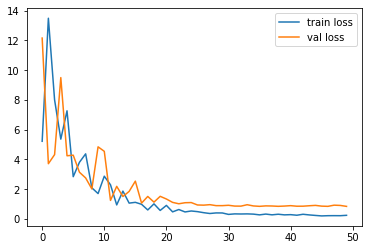

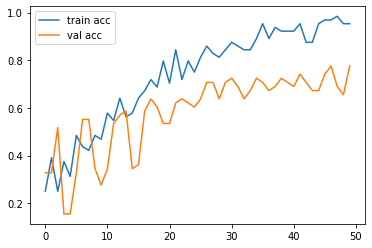

<Figure size 432x288 with 0 Axes>

In [18]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')


In [19]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('model_resnet50.h5')

In [20]:
y_pred = model.predict(test_set)

In [21]:
y_pred

array([[9.62887498e-06, 1.43713853e-03, 9.98553216e-01],
       [5.31263016e-02, 1.02107609e-02, 9.36662912e-01],
       [3.13277952e-02, 7.98743069e-01, 1.69929117e-01],
       [2.05582440e-01, 5.80658853e-01, 2.13758767e-01],
       [1.46131115e-02, 9.16340828e-01, 6.90460876e-02],
       [3.26653458e-02, 6.01197069e-04, 9.66733456e-01],
       [7.51001909e-02, 9.01085436e-01, 2.38144286e-02],
       [8.87412250e-01, 8.66117850e-02, 2.59760264e-02],
       [4.26684134e-02, 5.36786318e-01, 4.20545220e-01],
       [1.32470116e-01, 7.59724438e-01, 1.07805490e-01],
       [1.03981808e-01, 1.43197358e-01, 7.52820909e-01],
       [3.67013738e-02, 8.83526862e-01, 7.97717124e-02],
       [1.76301226e-02, 3.46081555e-01, 6.36288345e-01],
       [4.36766110e-02, 6.48343205e-01, 3.07980180e-01],
       [3.47827375e-01, 4.80583280e-01, 1.71589375e-01],
       [1.88629180e-01, 6.44809783e-01, 1.66560978e-01],
       [2.25184318e-02, 5.97894967e-01, 3.79586607e-01],
       [6.42560795e-02, 5.37144

In [22]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [23]:
y_pred

array([2, 2, 1, 1, 1, 2, 1, 0, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 2, 1, 1, 2, 2, 2, 2, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 2, 2, 1,
       1, 1, 1, 1, 2, 0, 2, 1, 1, 2, 0, 2, 1, 0])

In [27]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image


In [28]:
model=load_model('model_resnet50.h5')


In [29]:
img_data

NameError: name 'img_data' is not defined

In [39]:
img=image.load_img('/home/expert/aiusedcase/carbrand/Datasets/Test/mercedes/39.jpg',target_size=(224,224))

In [40]:
x=image.img_to_array(img)
x

array([[[  8.,  12.,  21.],
        [ 31.,  36.,  39.],
        [ 68.,  72.,  71.],
        ...,
        [ 82.,  95.,  86.],
        [ 87., 103.,  93.],
        [ 95., 110., 103.]],

       [[ 15.,  22.,  30.],
        [ 77.,  82.,  85.],
        [ 87.,  93.,  91.],
        ...,
        [ 75.,  88.,  81.],
        [ 50.,  65.,  58.],
        [ 18.,  33.,  26.]],

       [[ 15.,  22.,  30.],
        [ 77.,  82.,  85.],
        [ 87.,  93.,  91.],
        ...,
        [ 75.,  88.,  81.],
        [ 50.,  65.,  58.],
        [ 18.,  33.,  26.]],

       ...,

       [[192., 179., 135.],
        [195., 182., 138.],
        [197., 184., 140.],
        ...,
        [187., 173., 138.],
        [190., 177., 142.],
        [199., 186., 152.]],

       [[192., 179., 135.],
        [195., 182., 138.],
        [197., 184., 140.],
        ...,
        [187., 173., 138.],
        [190., 177., 142.],
        [199., 186., 152.]],

       [[192., 179., 134.],
        [195., 182., 137.],
        [197., 1

In [41]:

x.shape


(224, 224, 3)

In [42]:

x=x/255

In [43]:
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape


(1, 224, 224, 3)

In [44]:
model.predict(img_data)

array([[5.3542462e-04, 3.1616620e-03, 9.9630296e-01]], dtype=float32)

In [45]:
a=np.argmax(model.predict(img_data), axis=1)

In [46]:
a==2


array([ True])